In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

# Load data
mode = 'Daily'#or Weekly
datatype = 'crimes'
data = pd.read_csv('cleared_data.csv', index_col = 'DATE OCC', parse_dates = ['DATE OCC'])#Enter name for the datafile and column with data that is the index
data = data.resample('w' if mode == 'Weekly' else 'd').sum()



In [ ]:
data

,count
DATE OCC,
2016-01-03,317
2016-01-10,248
2016-01-17,250
2016-01-24,260
2016-01-31,245
...,...
2020-06-07,242
2020-06-14,295
2020-06-21,269


In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming 'data' is your cumulative COVID-19 case data
data = np.array(data['count'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

X, y = [], []
back_len = 4

for i in range(back_len, len(data)):
    X.append(data[i-back_len:i])
    y.append(data[i])
X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

test_size = 8
X_train, X_test, y_train, y_test = X[:-test_size],X[-test_size:],y[:-test_size],y[-test_size:]



model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=1)



Epoch 1/50
224/224 [==============================] - 4s 4ms/step - loss: 0.0425
Epoch 2/50
224/224 [==============================] - 1s 3ms/step - loss: 0.0347
Epoch 3/50
224/224 [==============================] - 1s 3ms/step - loss: 0.0347
Epoch 4/50
224/224 [==============================] - 1s 4ms/step - loss: 0.0336
Epoch 5/50
224/224 [==============================] - 1s 4ms/step - loss: 0.0338
Epoch 6/50
224/224 [==============================] - 1s 5ms/step - loss: 0.0346
Epoch 7/50
224/224 [==============================] - 1s 4ms/step - loss: 0.0334
Epoch 8/50
224/224 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 9/50
224/224 [==============================] - 1s 4ms/step - loss: 0.0336
Epoch 10/50
224/224 [==============================] - 1s 4ms/step - loss: 0.0337
Epoch 11/50
224/224 [==============================] - 1s 5ms/step - loss: 0.0340
Epoch 12/50
224/224 [==============================] - 1s 6ms/step - loss: 0.0340
Epoch 13/50
224/224 [====

In [ ]:
y_test

array([[0.32352941],
       [0.13235294],
       [0.22794118],
       [0.05147059],
       [0.44117647],
       [0.25      ],
       [0.11764706],
       [0.28676471]])

In [ ]:
model.predict(X_test)

1/1 [==============================] - 1s 799ms/step


array([[0.31774598],
       [0.3491499 ],
       [0.33060938],
       [0.31736457],
       [0.29469416],
       [0.27881134],
       [0.30367717],
       [0.30062115]], dtype=float32)

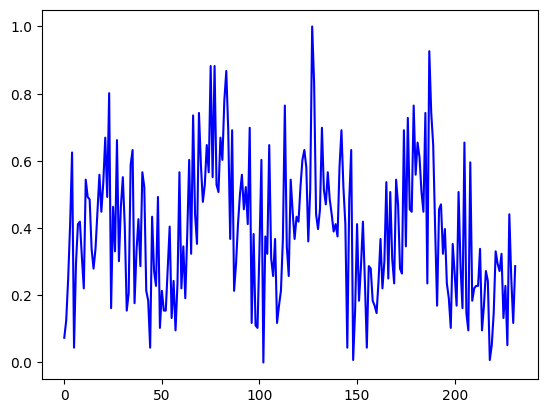

In [ ]:
plt.plot(np.concatenate([y_train,y_test]), color='blue', label='Actual')


1/1 [==============================] - 0s 129ms/step


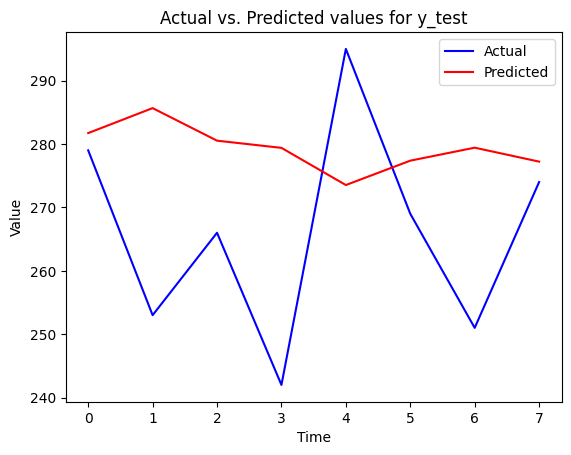

In [ ]:
# Generate predictions on the test data
y_test_predictions = model.predict(X_test)

# Plot the actual and predicted values for y_test
plt.plot(scaler.inverse_transform(y_test), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(y_test_predictions), color='red', label='Predicted')
plt.title('Actual vs. Predicted values for y_test')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(scaler.inverse_transform(y_test),scaler.inverse_transform(y_test_predictions))


0.07211302459906913

In [ ]:
reshaped = np.array(y_test_predictions).reshape(len(y_test_predictions),).astype('int64')
reshaped

array([280, 284, 279, 278, 272, 276, 278, 276])

In [ ]:
np.savetxt(f'LSTM_{mode}_{datatype}.txt',forecast)